## Part Time Data Science 07 class: Phase 1 Project
### Project by: Nicholas Kirui
### Date of Submission: 03 June 2024

## Project Overview
For this project, I will use exploratory data analysis to generate insights for a business stakeholder based on datasets provided.

### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## The Data Understanding
The data was collected from various locations and the different files have different formats. 
1. compressed CSV (comma-separated values) files:
       - bom.movie_gross
       - tn.movie_budgets
       - tmdb.movies
2. TSV (tab-separated values) files:
       - rt.movie_info.tsv
       - rt.reviews.tsv
3. Data located in a SQLite database:
    - im.db  
    - entiry relationship diagram: movie_data_erd
    - Table Names
        - movie_basics
        - directors
        - known_for
        - movie_akas
        - movie_ratings
        - persons
        - principals
        - writers

    - Most relevant tables:
        - ## Movie_basics
            - Table contains the basic information of the movies including the genres
        - ## movie_ratings
            - Table shows the ratings of the movies

______________________________________________________________________________________________________________________________________________________________

### Data preparation
- Import the necessary libraries
- Initial exploratory data analysis of all the datasets

In [2]:
import os
import sqlite3
import pandas as pd 
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

## Explore the in.db sqlite database
- Read the sqlite database using pandas dataframe
- use queries to get data from the relevant tables

In [3]:
im_path = os.path.join('im.db')

# Open up a connection
conn = sqlite3.connect(im_path)
# Initialize a cursor
cursor = conn.cursor()

In [4]:
table_name_query = """SELECT name
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
movie_basics_query = ''' 

SELECT *
FROM movie_basics

'''

# Use the line below to check your query's output
pd.read_sql(movie_basics_query, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:

movie_ratings_query = ''' 

SELECT *
FROM movie_ratings

'''

# Use the line below to check your query's output
pd.read_sql(movie_ratings_query, conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
pd.read_sql(movie_ratings_query, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
pd.read_sql(movie_basics_query, conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
top_20_genres = pd.read_sql(movie_basics_query, conn)['genres'].value_counts().head(20)
top_20_genres

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
Thriller                          3046
Action                            2219
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1454
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Name: genres, dtype: int64

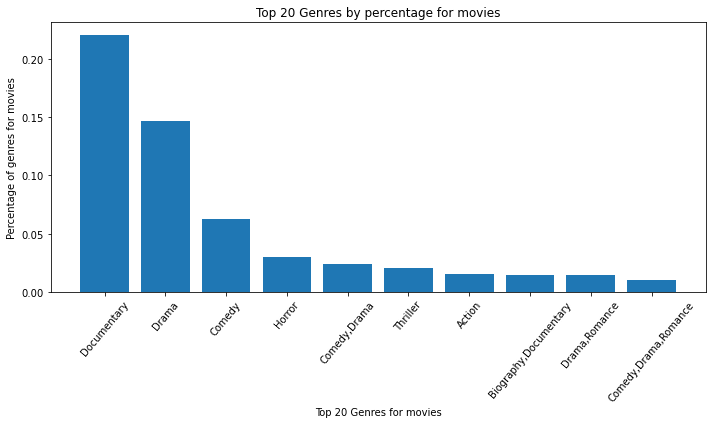

In [10]:
# Top twenty genres

fig, ax = plt.subplots(figsize=(10, 6))

top_20_genres = (pd.read_sql(movie_basics_query, conn)['genres'].value_counts().head(10)/ len(pd.read_sql(movie_basics_query, conn)))

plt.bar(x=top_20_genres.index,
        height=top_20_genres.values
)
plt.xticks(rotation=50)
ax.set_xlabel('Top 20 Genres for movies'),
ax.set_ylabel('Percentage of genres for movies');
ax.set_title('Top 20 Genres by percentage for movies')

plt.tight_layout()

### Explore the bom.movie_gross.csv file:
1. Read the bom.movie_gross.csv
2. Determine the different data types

In [11]:
# create a pandas movie_gross_df 
# read the bom.movie_gross.csv file into the movie_gross_df
# open the movie_gross_df
movie_gross_df = pd.read_csv('bom.movie_gross.csv')
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
# get the enteries and data types in the movie_gross_df
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### movie_gross_df:
1. 3387 rows
2. 5 columns:

       - title column - this is the title of the movie. Has 3387 enteries with no missing values - string/object datatype
       - studio column - the name of the studio where the movie was produced. Has 3382 enteries with 5 missing values - string/object datatype
       - domestic_gross column - the gross revenue generated in the domestic market by the movie. Has 3359 enteries with 28 missing values - float datatype
       - foreign_gross column - the gross revenue generated in the foreign market by the movie. Has 2037 enteries with 1350 missing values. The missing values could mean that the particular movie was not sold in the foreign market- string/object datatype
       - year column - the year when the movie was released. Has 3387 enteries.  - string/object datatype

### Data Cleaning

- there is missing data
- domestic and foreign gross earnings/income are float values - to be converted to integers
- generate a new variable showing the total earnings/incomes as an integer


Identify null/missing values:
- studio - has 5 missing values
- domestic_gross has 28 missing values
- foreign_gross has 1350 missing values

In [13]:
null_values = movie_gross_df.isnull().sum()
print(null_values)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Convert the domestic and foreign gross income into integers
- first we have to fill all the null values with zero '0'

In [14]:
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(0)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(0)

In [15]:
null_values = movie_gross_df.isnull().sum()
print(null_values)

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


The domestic and foreign gross income has been filled with 0 and there are no missing values in these two columns
- Convert the variable for domestic_gross and foreign gross into integers
- use the .astype variable, without changing the integrity of the data

In [16]:
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].astype('Int64')
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   Int64 
 3   foreign_gross   3387 non-null   object
 4   year            3387 non-null   int64 
dtypes: Int64(1), int64(1), object(3)
memory usage: 135.7+ KB


domestic_gross variable converted to integer

The foreign_gross has a float values in some of the rows:
- Incomplete conversion due to a string in position 1872 (Unable to parse string "1,131.6" at position 1872). index 1872
- Incomplete conversion due to a string in position 1873 (Unable to parse string "1,019.4" at position 1873). index 1873
- Incomplete conversion due to a string in position 1874 (Unable to parse string "1,163.0" at position 1874). index 1874
- Incomplete conversion due to a string in position 2076 (Unable to parse string "1,010.0" at position 2760). index 2760
- Incomplete conversion due to a string in position 2076 (Unable to parse string "1,369.5" at position 3079). index 3079

First retrieve these rows and view the data,
Then to resolve this, these values in this columns will be replaced with 0

In [17]:
# retrieve the rows with these values:
movie_gross_df[movie_gross_df['foreign_gross'] == '1,131.6']

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000,"1,131.6",2015


In [18]:
movie_gross_df[movie_gross_df['foreign_gross'] == '1,019.4']

,title,studio,domestic_gross,foreign_gross,year
1873,Jurassic World,Uni.,652300000,"1,019.4",2015


In [19]:
movie_gross_df[movie_gross_df['foreign_gross'] == '1,163.0']

,title,studio,domestic_gross,foreign_gross,year
1874,Furious 7,Uni.,353000000,"1,163.0",2015


In [20]:
movie_gross_df[movie_gross_df['foreign_gross'] == '1,369.5']

,title,studio,domestic_gross,foreign_gross,year
3079,Avengers: Infinity War,BV,678800000,"1,369.5",2018


In [21]:
# Change the value in the foreign gross in these rows into 0 using .loc function
movie_gross_df.loc[1872, ['foreign_gross']] = 0
movie_gross_df.loc[1873, ['foreign_gross']] = 0
movie_gross_df.loc[1874, ['foreign_gross']] = 0
movie_gross_df.loc[2760, ['foreign_gross']] = 0
movie_gross_df.loc[3079, ['foreign_gross']] = 0

In [22]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype('int')
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   Int64 
 3   foreign_gross   3387 non-null   int32 
 4   year            3387 non-null   int64 
dtypes: Int64(1), int32(1), int64(1), object(2)
memory usage: 122.5+ KB


In [23]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype('Int64')
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3387 non-null   Int64 
 3   foreign_gross   3387 non-null   Int64 
 4   year            3387 non-null   int64 
dtypes: Int64(2), int64(1), object(2)
memory usage: 139.0+ KB


Create a new column that shows the total revenue for each movie
    - total_gross = domestic_gross + foreign_gross

In [24]:
movie_gross_df['total_gross'] = movie_gross_df['domestic_gross'] + movie_gross_df['foreign_gross']
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000


### Determine if there are outliers
- Use of boxplots

<AxesSubplot:>

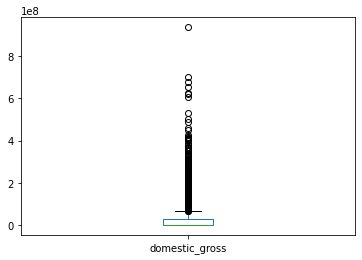

In [25]:
movie_gross_df.boxplot(column=['domestic_gross'], grid = False)

<AxesSubplot:>

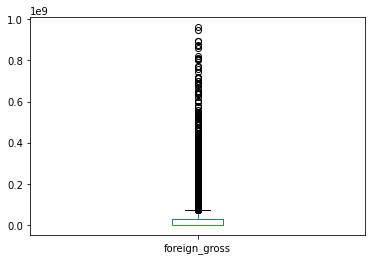

In [26]:
movie_gross_df.boxplot(column=['foreign_gross'], grid = False)

<AxesSubplot:>

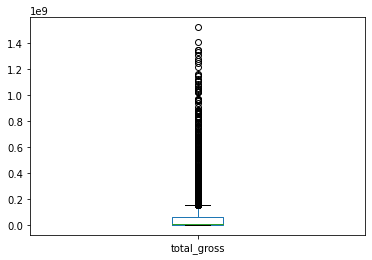

In [27]:
movie_gross_df.boxplot(column=['total_gross'], grid = False)

<AxesSubplot:>

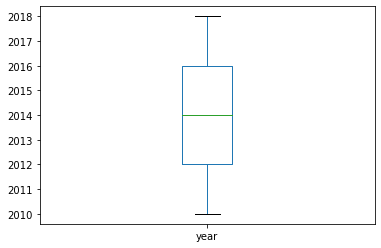

In [28]:
movie_gross_df.boxplot(column=['year'], grid = False)

## Data analysis
- Total number of movies per year

In [29]:
movie_gross_df['year'].value_counts().sort_index()

2010    328
2011    399
2012    400
2013    350
2014    395
2015    450
2016    436
2017    321
2018    308
Name: year, dtype: int64

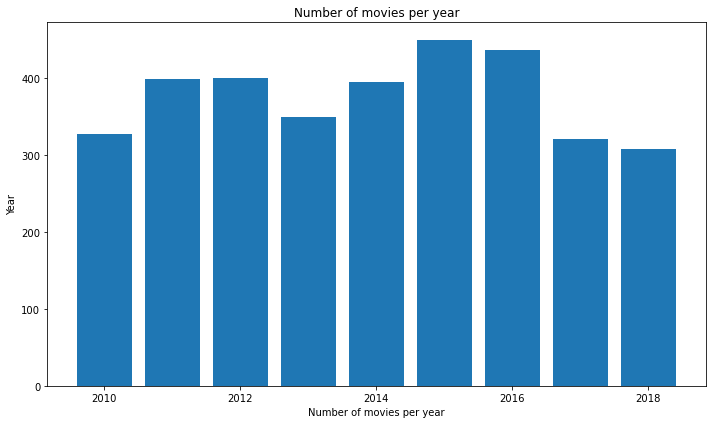

In [30]:
# bar graph showing number of movies per year
fig, ax = plt.subplots(figsize=(10, 6))

yearly_movies = movie_gross_df['year'].value_counts()

plt.bar(
    x=yearly_movies.index,
    height=yearly_movies.values
)
ax.set_xlabel('Number of movies per year'),
ax.set_ylabel('Year');
ax.set_title('Number of movies per year')

plt.tight_layout()

In [31]:
movie_gross_df['studio'].value_counts().head(30)

IFC        166
Uni.       147
WB         140
Fox        136
Magn.      136
SPC        123
Sony       110
BV         106
LGF        103
Par.       101
Eros        89
Wein.       77
CL          74
Strand      68
FoxS        67
RAtt.       66
KL          62
Focus       60
WGUSA       58
CJ          56
MBox        54
UTV         50
A24         49
WB (NL)     45
FM          42
LG/S        41
Cohen       40
ORF         37
SGem        35
Rela.       35
Name: studio, dtype: int64

Text(0.5, 1.0, 'Number of movies per studio')

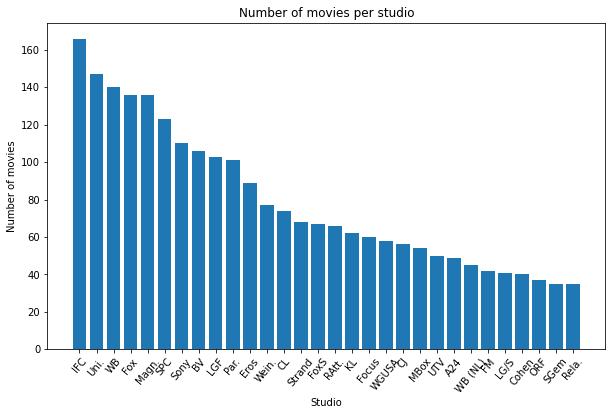

In [32]:
# bar graph showing number of movies per studio

fig, ax = plt.subplots(figsize=(10, 6))

studio_movies = movie_gross_df['studio'].value_counts().head(30)

plt.bar(
    x=studio_movies.index,
    height=studio_movies.values
)
plt.xticks(rotation=50)
ax.set_xlabel('Studio'),
ax.set_ylabel('Number of movies');
ax.set_title('Number of movies per studio')


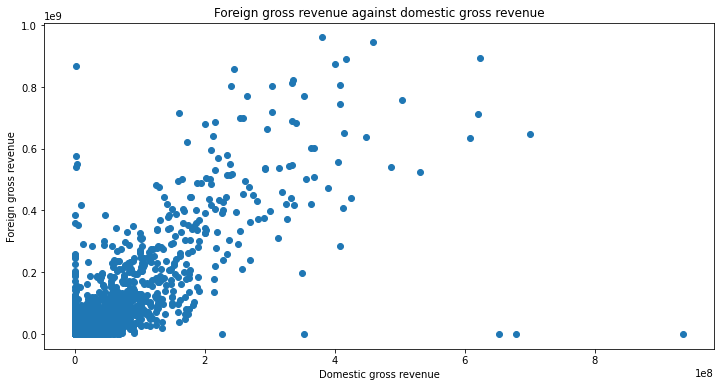

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(movie_gross_df['domestic_gross'], movie_gross_df['foreign_gross'])
ax.set_xlabel('Domestic gross revenue')
ax.set_ylabel('Foreign gross revenue')
ax.set_title('Foreign gross revenue against domestic gross revenue')
plt.show()

## tn.movie_budgets.csv

Explore the tn.movie_budgets.csv
- Read the tn.movie_budgets.csv file 

In [34]:
# create a pandas mmovie_budgets_df 
# read the bom.movie_gross.csv file into the movie_budgets_df
# open the mmovie_budgets_df

movie_budgets_df = pd.read_csv('tn.movie_budgets.csv')
movie_budgets_df 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Friday, December 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"Friday, May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Friday, June 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"Friday, May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Friday, December 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Monday, December 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Friday, April 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Wednesday, July 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Tuesday, September 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [35]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## movie_gross_df: Data understanding
1. 5782 rows
2. 6 columns:
- id column - this is the id of the movie. Has 5782 enteries with no missing values. Integer datatype
- release column - this is the release_date of the movie. Has 5782 enteries with no missing values. string/object datatype
- movie column - this is the title of the movie. Has 5782 enteries with no missing values. string/object datatype
- production_budget column - this is the production budget of the movie. Has 5782 enteries with no missing values. string/object datatype
- domestic_gross column - this is the domestic_gross revenue of the movie. Has 5782 enteries with no missing values. string/object datatype
- domestic_gross column - this is the domestic_gross revenue of the movie. Has 5782 enteries with no missing values. string/object datatype

### Data cleaning

Determine if there are missing values
- there are no missing values in the dataset

In [36]:
null_values_budgets = movie_budgets_df.isnull().sum()
print(null_values_budgets)

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


explore the data types
- convert the production_budget, domestic, gross and worldwide gross into integers

Look throught the currency columns i.e production_budget, domestic_gross, worldwide_gross -- there are different data types contained in there
 - all the rows are strings
 - use the replace function to remove '$',',' and replace with data type float

In [37]:
movie_budgets_df['production_budget'].apply(type).value_counts()

<class 'str'>    5782
Name: production_budget, dtype: int64

In [38]:
# - use the replace function to remove '$',',' in production_budget column and replace with data type float
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace(',','').str.replace('$','').astype('float')

In [39]:
# - use the replace function to remove '$',',' in domestic_gross column and replace with data type float
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace(',','').str.replace('$','').astype('float')

In [40]:
# - use the replace function to remove '$',',' in worldwide_gross column and replace with data type float
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype('float')

- look through the dtypes to determine if all the string values have been converted to floats

In [41]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


- convert the production_budget, domestic_gross and worldwide_gross datatype from float into integers

In [42]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype('Int64')

movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype('Int64')

movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype('Int64')

In [43]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   Int64 
 4   domestic_gross     5782 non-null   Int64 
 5   worldwide_gross    5782 non-null   Int64 
dtypes: Int64(3), int64(1), object(2)
memory usage: 288.1+ KB


Generate new column with total gross revenue = domestic gross + worldwide gross

In [44]:
movie_budgets_df['total_gross'] = movie_budgets_df['domestic_gross'] + movie_budgets_df['worldwide_gross']
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross
0,1,"Friday, December 18, 2009",Avatar,425000000,760507625,2776345279,3536852904
1,2,"Friday, May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,"Friday, June 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700
3,4,"Friday, May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,"Friday, December 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129


In [45]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   Int64 
 4   domestic_gross     5782 non-null   Int64 
 5   worldwide_gross    5782 non-null   Int64 
 6   total_gross        5782 non-null   Int64 
dtypes: Int64(4), int64(1), object(2)
memory usage: 338.9+ KB


Generate a new column that has the average gross margin i.e total gross - production budget

In [46]:
movie_budgets_df['margin_gross'] = movie_budgets_df['total_gross'] - movie_budgets_df['production_budget']
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,margin_gross
0,1,"Friday, December 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"Friday, May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Friday, June 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"Friday, May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Friday, December 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


Convert the data type of release_date from string to Datetime 

In [47]:
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   Int64         
 4   domestic_gross     5782 non-null   Int64         
 5   worldwide_gross    5782 non-null   Int64         
 6   total_gross        5782 non-null   Int64         
 7   margin_gross       5782 non-null   Int64         
dtypes: Int64(5), datetime64[ns](1), int64(1), object(1)
memory usage: 389.7+ KB


Get year_of release from the release_date

In [48]:
movie_budgets_df['year_of_release'] = pd.DatetimeIndex(movie_budgets_df['release_date']).year
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   Int64         
 4   domestic_gross     5782 non-null   Int64         
 5   worldwide_gross    5782 non-null   Int64         
 6   total_gross        5782 non-null   Int64         
 7   margin_gross       5782 non-null   Int64         
 8   year_of_release    5782 non-null   int64         
dtypes: Int64(5), datetime64[ns](1), int64(2), object(1)
memory usage: 434.9+ KB


In [49]:
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,margin_gross,year_of_release
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3536852904,3111852904,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,2017
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,0,-7000,2018
5778,79,1999-04-02,Following,6000,48482,240495,288977,282977,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2676,-2324,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,0,-1400,2015


Looking through the data to determine the release_date greater than 2023

In [50]:
movie_budgets_df[movie_budgets_df['year_of_release'] > 2023]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,margin_gross,year_of_release
4569,70,2025-12-30,Ben-Hur: A Tale of the Christ,3900000,9000000,9000000,18000000,14100000,2025
4984,85,2027-08-12,Wings,2000000,0,0,0,-2000000,2027
5524,25,2029-02-01,The Broadway Melody,379000,2800000,4358000,7158000,6779000,2029
5606,7,2025-11-19,The Big Parade,245000,11000000,22000000,33000000,32755000,2025


Look through the data to determine the year of the rows: 4569, 4984, 5524, 5606

In [51]:
movie_budgets_df.loc[4569]

id                                              70
release_date                   2025-12-30 00:00:00
movie                Ben-Hur: A Tale of the Christ
production_budget                          3900000
domestic_gross                             9000000
worldwide_gross                            9000000
total_gross                               18000000
margin_gross                              14100000
year_of_release                               2025
Name: 4569, dtype: object

In [52]:
movie_budgets_df.loc[4984]

id                                    85
release_date         2027-08-12 00:00:00
movie                              Wings
production_budget                2000000
domestic_gross                         0
worldwide_gross                        0
total_gross                            0
margin_gross                    -2000000
year_of_release                     2027
Name: 4984, dtype: object

In [53]:
movie_budgets_df.loc[5524]

id                                    25
release_date         2029-02-01 00:00:00
movie                The Broadway Melody
production_budget                 379000
domestic_gross                   2800000
worldwide_gross                  4358000
total_gross                      7158000
margin_gross                     6779000
year_of_release                     2029
Name: 5524, dtype: object

In [54]:
movie_budgets_df.loc[5606]

id                                     7
release_date         2025-11-19 00:00:00
movie                     The Big Parade
production_budget                 245000
domestic_gross                  11000000
worldwide_gross                 22000000
total_gross                     33000000
margin_gross                    32755000
year_of_release                     2025
Name: 5606, dtype: object

There are four movies in the dataset with a release_date in future after 2023 in rows (2025 to 2029): in rows 4569, 4984, 5524, 5606
- These rows of data shall be dropped and retain a clean dataframe: clean_movie_budgets_df

In [55]:
clean_movie_budgets_df = movie_budgets_df.drop([4569, 4984, 5524, 5606])
clean_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5778 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5778 non-null   int64         
 1   release_date       5778 non-null   datetime64[ns]
 2   movie              5778 non-null   object        
 3   production_budget  5778 non-null   Int64         
 4   domestic_gross     5778 non-null   Int64         
 5   worldwide_gross    5778 non-null   Int64         
 6   total_gross        5778 non-null   Int64         
 7   margin_gross       5778 non-null   Int64         
 8   year_of_release    5778 non-null   int64         
dtypes: Int64(5), datetime64[ns](1), int64(2), object(1)
memory usage: 479.6+ KB


Look through the new dataframe and find out it the rows with the release_date > 2023 have been dropped.
- this does not return any data in the rows

In [56]:
clean_movie_budgets_df[clean_movie_budgets_df['year_of_release'] > 2023]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,margin_gross,year_of_release


reset the index in the new dataframe: clean_movie_budgets_df

In [57]:
clean_movie_budgets_df.reset_index(inplace = True)
clean_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5778 entries, 0 to 5777
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              5778 non-null   int64         
 1   id                 5778 non-null   int64         
 2   release_date       5778 non-null   datetime64[ns]
 3   movie              5778 non-null   object        
 4   production_budget  5778 non-null   Int64         
 5   domestic_gross     5778 non-null   Int64         
 6   worldwide_gross    5778 non-null   Int64         
 7   total_gross        5778 non-null   Int64         
 8   margin_gross       5778 non-null   Int64         
 9   year_of_release    5778 non-null   int64         
dtypes: Int64(5), datetime64[ns](1), int64(3), object(1)
memory usage: 479.7+ KB


### Determine if there are outliers
- Use of boxplots

<AxesSubplot:>

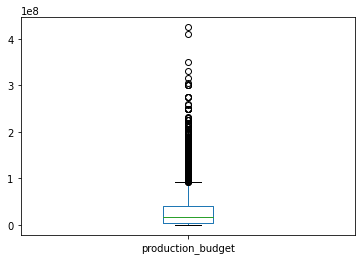

In [58]:
clean_movie_budgets_df.boxplot(column=['production_budget'], grid = False)

<AxesSubplot:>

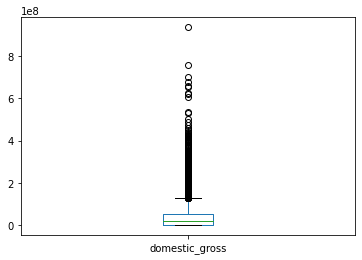

In [59]:
clean_movie_budgets_df.boxplot(column=['domestic_gross'], grid = False)

<AxesSubplot:>

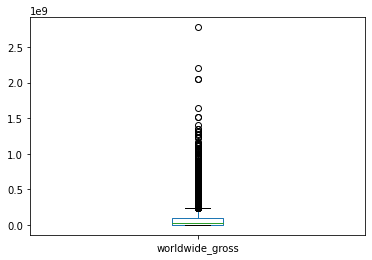

In [60]:
clean_movie_budgets_df.boxplot(column=['worldwide_gross'], grid = False)

<AxesSubplot:>

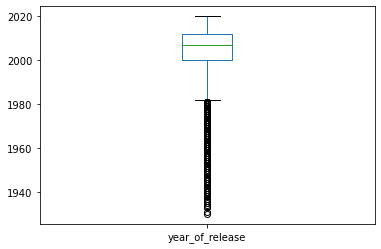

In [61]:
clean_movie_budgets_df.boxplot(column=['year_of_release'], grid = False)

## Data analysis

Top twenty movie genres based on the im.db sqlite database

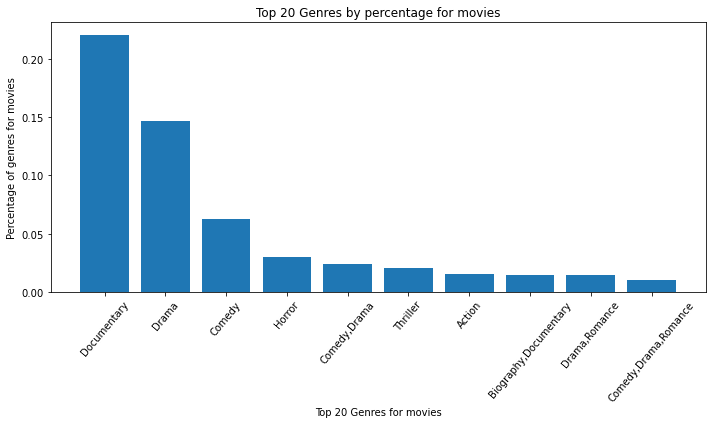

In [62]:
# Top twenty genres

fig, ax = plt.subplots(figsize=(10, 6))

top_20_genres = (pd.read_sql(movie_basics_query, conn)['genres'].value_counts().head(10)/ len(pd.read_sql(movie_basics_query, conn)))

plt.bar(x=top_20_genres.index,
        height=top_20_genres.values
)
plt.xticks(rotation=50)
ax.set_xlabel('Top 20 Genres for movies'),
ax.set_ylabel('Percentage of genres for movies');
ax.set_title('Top 20 Genres by percentage for movies')

plt.tight_layout()


- Correlation between the domestic gross revenue and worldwide gross revenue

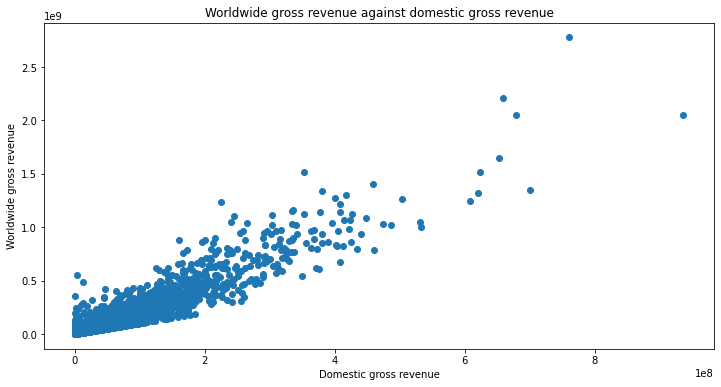

In [63]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(clean_movie_budgets_df['domestic_gross'], clean_movie_budgets_df['worldwide_gross'])
ax.set_xlabel('Domestic gross revenue')
ax.set_ylabel('Worldwide gross revenue')
ax.set_title('Worldwide gross revenue against domestic gross revenue')
plt.show()

- Total number of movies per year

In [64]:
clean_movie_budgets_df['year_of_release'].value_counts().head(30)

2015    339
2010    274
2008    264
2006    260
2014    255
2011    254
2009    239
2013    238
2012    235
2005    223
2016    221
2007    220
2002    210
2004    206
2003    201
2000    189
2001    181
1999    181
2017    168
1998    151
2018    143
1996    104
1997    102
1995     75
2019     67
1994     56
1993     49
1991     39
1992     36
1987     35
Name: year_of_release, dtype: int64

In [65]:
clean_movie_budgets_df['year_of_release'].value_counts().head(20)

2015    339
2010    274
2008    264
2006    260
2014    255
2011    254
2009    239
2013    238
2012    235
2005    223
2016    221
2007    220
2002    210
2004    206
2003    201
2000    189
2001    181
1999    181
2017    168
1998    151
Name: year_of_release, dtype: int64

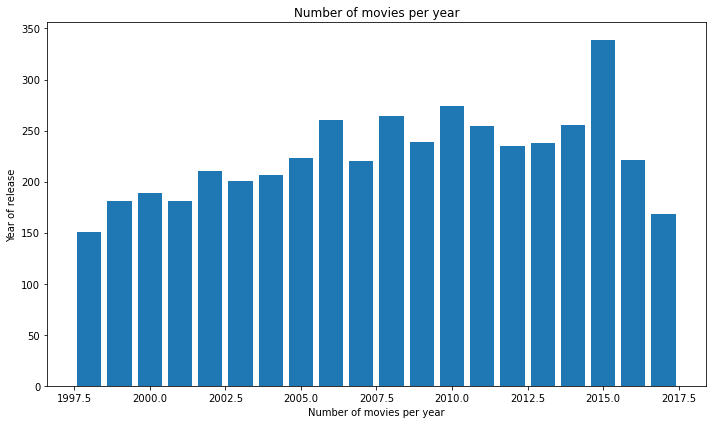

In [66]:
# bar graph showing number of movies per year
fig, ax = plt.subplots(figsize=(10, 6))

yearly_movies = clean_movie_budgets_df['year_of_release'].value_counts().head(20)

plt.bar(
    x=yearly_movies.index,
    height=yearly_movies.values
)
ax.set_xlabel('Number of movies per year'),
ax.set_ylabel('Year of release');
ax.set_title('Number of movies per year')

plt.tight_layout()


___________________________________________________________________________________________________________________________________________________________

### TMDB.MOVIES.CSV
___________________________________________________________________________________________________________________________________________________________

Explore the tmdb.movies.csv
- Read the tmdb.movies.csv file 

In [67]:
tmdb_movies_df = pd.read_csv('tmdb.movies.csv')
tmdb_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [68]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## tmdb_movies_df

### Data cleaning
1. 26517 rows
2. 10 columns:
- genre_ids column - this is the genre_id of the movie. Has 26517 enteries with no missing values. string/object datatype
- id column - this is the id of the movie. Has 26517 enteries with no missing values. integer datatype
- original_language - this is original language in which the movie was produced. Has 26517 enteries with no missing values. string/object datatype
- original_title - this is original title of the movie. Has 26517 enteries with no missing values. string/object datatype
- popularity - this is popularity rating of the movie. Has 26517 enteries with no missing values. float datatype
- release_date - this is date of release of the movie . Has 26517 enteries with no missing values. string/object datatype
- title - this is the title of the movie. Has 26517 enteries with no missing values. string/object datatype
- vote_avarage - this is average vote count received by the movie in the ratins done. Has 26517 enteries with no missing values. string/object datatype
- vote_count - his is vote count received by the movie in the ratins done. Has 26517 enteries with no missing values. string/object datatype

Determine if there are missing values
- there are no missing values in the dataset

In [69]:
null_values_tmdb = tmdb_movies_df.isnull().sum()
print(null_values_tmdb)

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


Abstract year from release date

In [70]:
# Convert the data type of release_date from string to Datetime 
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


abstract the year from Datetime and create a new column with name: year_release

In [71]:
tmdb_movies_df['year_release'] = pd.DatetimeIndex(tmdb_movies_df['release_date']).year
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
 10  year_release       26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 2.2+ MB


In [72]:
tmdb_movies_df['original_language'].apply(type).value_counts()

<class 'str'>    26517
Name: original_language, dtype: int64

In [73]:
tmdb_movies_df['original_language'].value_counts().head(20)

en    23291
fr      507
es      455
ru      298
ja      265
de      237
zh      177
hi      172
it      123
pt       96
ko       93
sv       68
da       54
pl       52
no       50
cn       49
nl       48
th       41
he       41
ar       31
Name: original_language, dtype: int64

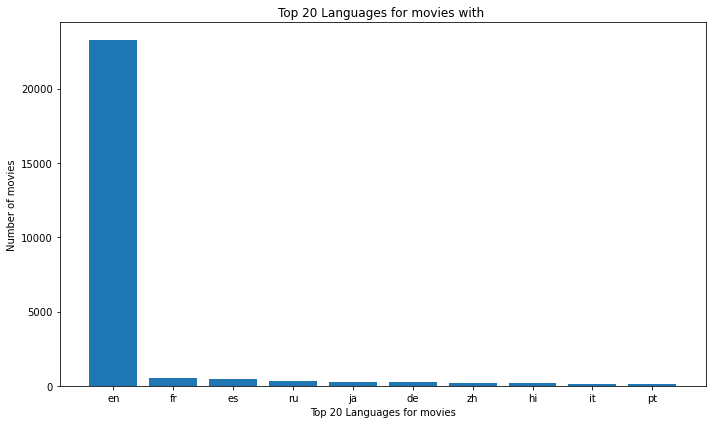

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

top_20_languages = tmdb_movies_df['original_language'].value_counts().head(10)

plt.bar(x=top_20_languages.index,
        height=top_20_languages.values
)
ax.set_xlabel('Top 20 Languages for movies'),
ax.set_ylabel('Number of movies');
ax.set_title('Top 20 Languages for movies with ')

plt.tight_layout()